In [ ]:
# Data Analytics I
# 1. Create a Linear Regression Model using Python/R to predict home prices using Boston
# Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing
# dataset contains information about various houses in Boston through different
# parameters. There are 506 samples and 14 feature variables in this dataset. The
# objective is to predict the value of prices of the house using the given features.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #This imports the function used to split your dataset into training and testing sets.
from sklearn.metrics import mean_squared_error, r2_score #Measures the average of the squares of errors & proportion of variance in target that is predictable from the input.
from sklearn.impute import SimpleImputer #This imports a tool to handle missing values (NaN) in your dataset.

In [75]:
df = pd.read_csv("C:/Users/Manish/Downloads/BostonHousing.csv")

In [76]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [77]:
df.columns #df.columns is an attribute in pandas used to Return the list of column names of a DataFrame

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [78]:
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [79]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [80]:
y = df['MEDV']

In [81]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
# x = features (input variables) y = target (output variable)
# test_size=0.25 → 25% of the data will be used for testing, 75% for training
# random_state=42 → sets a seed so you get the same split every time (for reproducibility)

In [83]:
imputer = SimpleImputer(strategy='mean') #This creates an imputer that will fill missing values (NaNs) with the mean of each column.
x_train = imputer.fit_transform(x_train)
# fit: calculates the mean of each column in x_train
# transform: replaces missing values with those means

In [84]:
model = LinearRegression() #This creates a Linear Regression model object from scikit-learn.
model.fit(x_train,y_train) #x_train: the input features & y_train: the target values 

LinearRegression()

In [60]:
imputer = SimpleImputer(strategy='mean') #Creates an imputer that replaces NaNs with column means.
x_train = imputer.fit_transform(x_train)  # Calculates column means from x_train and fills missing values.
x_test = imputer.transform(x_test) #Uses the same means (from x_train) to fill NaNs in x_test. this avoid data leakage.

C:\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [61]:
y_pred = model.predict(x_test) #This line uses the trained Linear Regression model to make predictions.

In [62]:
y_pred

array([29.08704658, 36.49751777, 14.75058511, 25.32260401, 18.52519952,
       22.98817551, 18.11702501, 14.57035902, 22.11730376, 20.85703051,
       24.95012374, 18.81380503, -6.45908614, 21.83794137, 19.02527786,
       25.57305657, 19.51130595,  5.97913194, 40.86663995, 17.23497854,
       24.99367838, 30.24655981, 11.61866835, 22.98221155, 17.33667307,
       15.02169156, 21.32977477, 14.17885296, 22.92100019, 19.48841673,
       22.37748584, 25.28735416, 25.6915216 , 16.84531425, 16.34448789,
       16.76708901, 31.12253362, 20.35040518, 24.33856208, 22.87527284,
       14.52526247, 32.07284193, 42.81941615, 17.78346845, 27.54072374,
       16.46350025, 14.07463136, 26.3749535 , 19.80529669, 30.1906532 ,
       21.0434474 , 33.71632885, 16.26618038, 26.36568554, 39.77974921,
       22.29882315, 18.71733695, 32.70334753, 25.40699003, 13.08551108,
       22.87658181, 30.74231071, 31.50599138, 16.35550885, 20.62987673,
       16.95083657, 20.12863857, 26.23345744, 30.90195304, 11.18

In [65]:
model.score(x_train,y_train)
#is used to evaluate the performance of a trained model on the training data.

0.7379310918074927

In [64]:
model.score(x_test,y_test)
#is used to evaluate how well your trained model performs on test data — data it hasn't seen during training.

0.6801782663020759

In [68]:
mean_squared_error(y_test,y_pred)
#calculates the Mean Squared Error (MSE) between:y_test: actual values & y_pred: predicted values

22.39620248942775

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))
#calculates the Root Mean Squared Error (RMSE).
# mean_squared_error(y_test, y_pred) → measures average squared error
# np.sqrt(...) → takes the square root to bring it back to original units

np.float64(4.732462624197654)

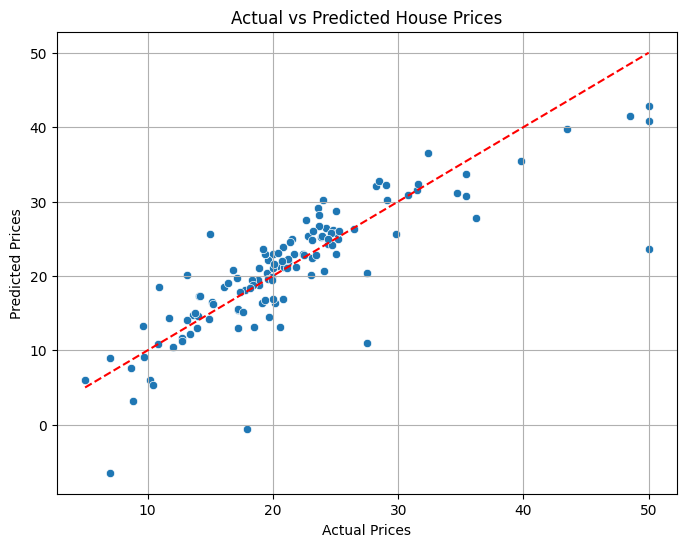

In [71]:
plt.figure(figsize=(8,6)) #sets the size of the figure in inches (width=8, height=6)
sns.scatterplot(x=y_test, y=y_pred)  #x=y_test: actual values, y=y_pred: values predicted by your model.
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()  #Displays the final plot.
# use of graph
# Visually measure prediction accuracy
# Understand model strengths and weaknesses
# Communicate results clearly in your project report or presentation